HW6 Spike sorting
    Read this page: https://en.wikipedia.org/wiki/Spike_sorting#:~:targetText=Spike%20sorting%20is%20a%20class,neurons%20from%20background%20electrical%20noise.
    Use dimensionality reduction techniques and clustering algorithms to identify groups of similar spikes

    For instance:
        TRY DIFFERENT THRESHOLDS TO EXTRACT SPIKES (change tf parameter)
        DO PCA
        DO KMEANs
        Visualize average waveform associated to each spike:
            plt.plot(mean(waveform[labels==0], axis=0))

    How many waveforms (neurons/units) are there?
    Plot the clustering result against the first 2 principal components
    Plot the average waveform of each neuron overlaid



In [1]:
import numpy as np
import pylab as plt
trace = np.load('simulation_1.npy')
plt.plot(trace[:100000])
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
def get_spikes(data, spike_window=80, tf=5, offset=10, max_thresh=350):
    # extract spike waveforms
    # Calculate threshold based on data mean
    thresh = np.mean(np.abs(data)) *tf

    # Find positions wherere the threshold is crossed
    pos = np.where(data > thresh)[0]
    pos = pos[pos > spike_window]

    # Extract potential spikes and align them to the maximum
    spike_samp = []
    wave_form = np.empty([1, spike_window*2])
    for i in pos:
        if i < data.shape[0] - (spike_window+1):
            # Data from position where threshold is crossed to end of window
            tmp_waveform = data[i:i+spike_window*2]

            # Check if data in window is below upper threshold (artifact rejection)
            if np.max(tmp_waveform) < max_thresh:
                # Find sample with maximum data point in window
                tmp_samp = np.argmax(tmp_waveform) +i

                # Re-center window on maximum sample and shift it by offset
                tmp_waveform = data[tmp_samp-(spike_window-offset):tmp_samp+(spike_window+offset)]

                # Append data
                spike_samp = np.append(spike_samp, tmp_samp)
                wave_form = np.append(wave_form, tmp_waveform.reshape(1, spike_window*2), axis=0)

    # Remove duplicates
    ind = np.where(np.diff(spike_samp) > 1)[0]
    spike_samp = spike_samp[ind]
    wave_form = wave_form[ind]

    return spike_samp, wave_form

tf = 4.0


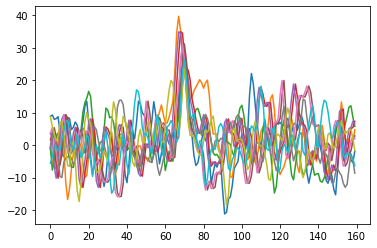

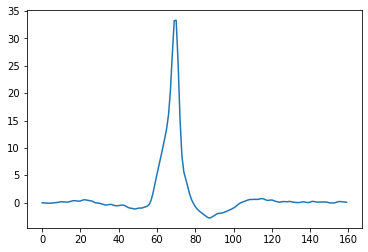

tf = 8.0


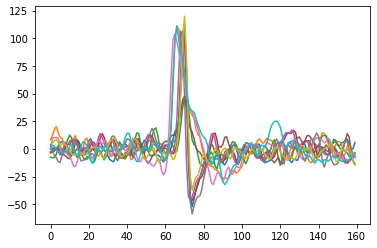

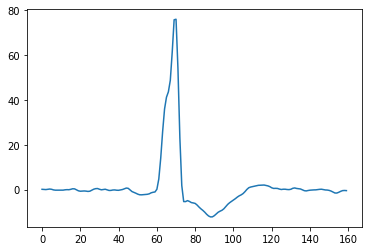

tf = 12.0


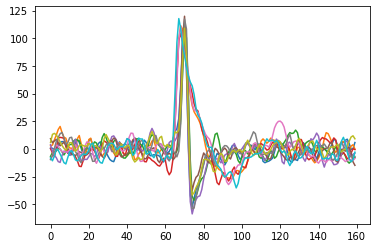

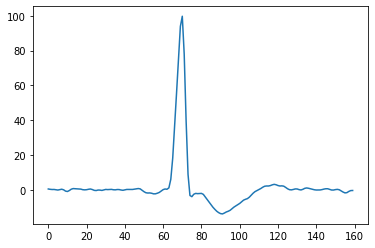

tf = 16.0


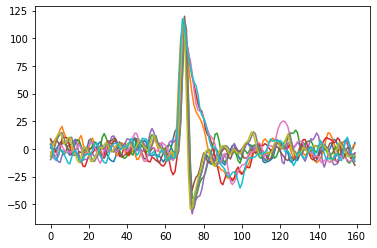

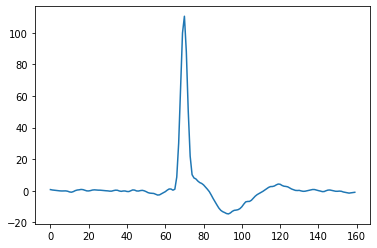

tf = 20.0


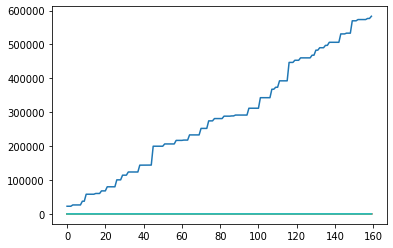

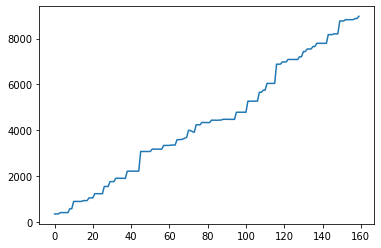

In [8]:
tfrange = np.linspace(4,20,5)
for i in range(len(tfrange)):
    print('tf = {}'.format(tfrange[i]))
    spike_samp, wave_form = get_spikes(trace, tf=tfrange[i])
    plt.show(plt.plot(wave_form[:10].T))
    plt.show(plt.plot(wave_form[:].mean(axis=0)))

In [10]:
np.shape(wave_form)

(65, 160)

In [4]:
spike_samp, wave_form = get_spikes(trace, tf=8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
trace = trace.reshape(-1,1)
waveform_scaled = minmax.fit_transform(wave_form)

## Clustering result from first two components of PCA

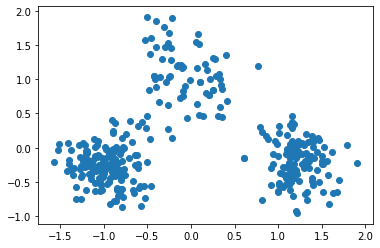

In [5]:
#use waveforms as features for PCA

pca = PCA(n_components=10)
pca_comp = pca.fit_transform(waveform_scaled)

#plot first two components
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('RdYlBu')
ax = plt.scatter(pca_comp[:, 0], pca_comp[:, 1])
# plt.colorbar(ax)
plt.show()

## visually it looks like we have 3 clusters/neurons here

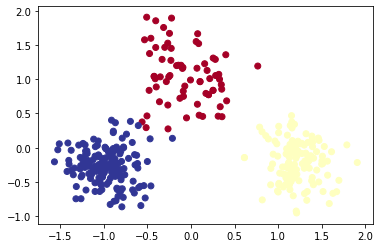

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
neurons = kmeans.fit_predict(pca_comp)
ax = plt.scatter(pca_comp[:, 0], pca_comp[:, 1], c=neurons, cmap=cm)

In [7]:
np.shape(wave_form)

(369, 160)

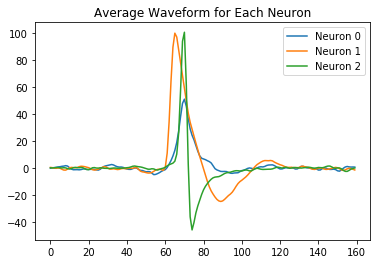

In [8]:
for i in range(3):
    cluster_mean = wave_form[neurons==i, :].mean(axis=0)
    cluster_std = wave_form[neurons==i, :].std(axis=0)

    plt.plot(cluster_mean, label='Neuron {}'.format(i))
    plt.title('Average Waveform for Each Neuron')
plt.legend()
plt.show()